### Impoart Libraries 

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv ("NHANES_age_prediction.csv")

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
df.tail()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [6]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [7]:
df['SEQN'].unique()

array([73564., 73568., 73576., ..., 83713., 83718., 83727.])

In [8]:
df['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

In [9]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2273    False
2274    False
2275    False
2276    False
2277    False
Length: 2278, dtype: bool

In [11]:
#Drop the Id columns 
df_new = df.drop(columns=('SEQN'), index=1)
df_new.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08


In [12]:
#pip install missingno

In [13]:
import missingno as msno

<Axes: >

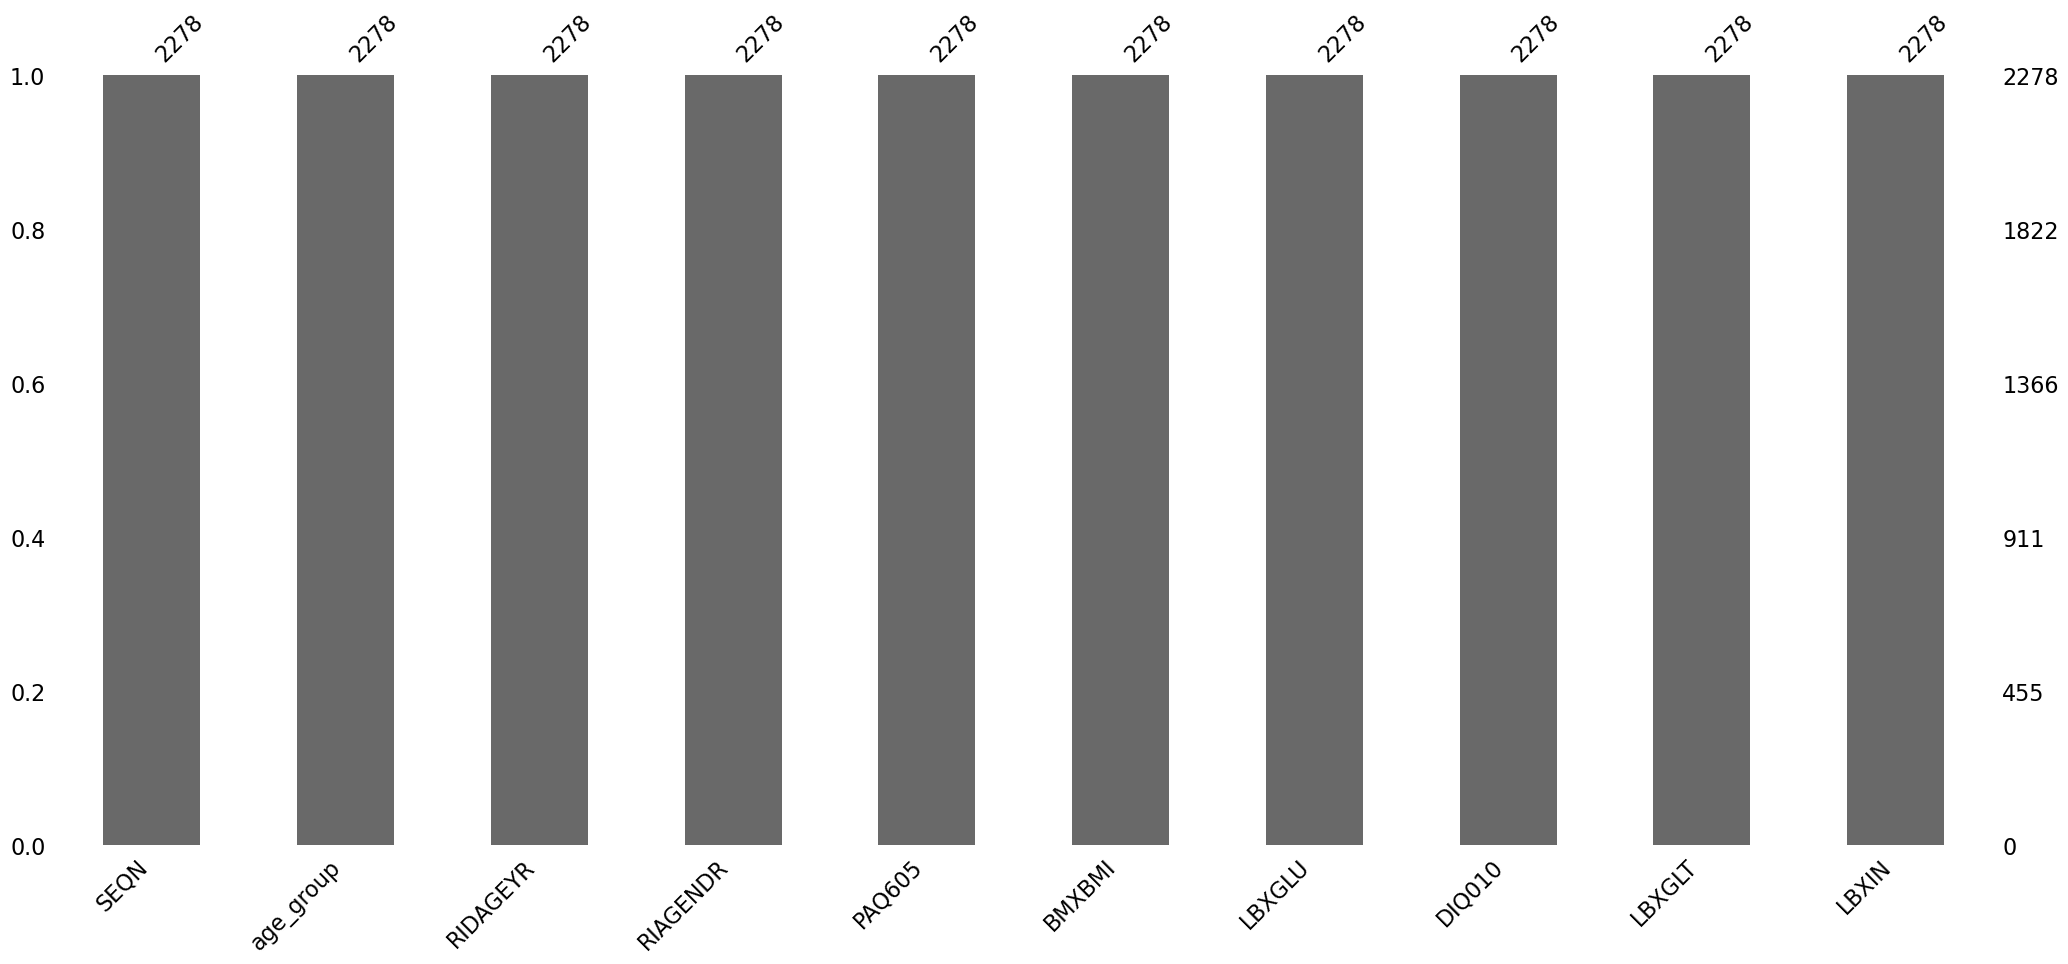

In [14]:
msno.bar(df)

<Axes: >

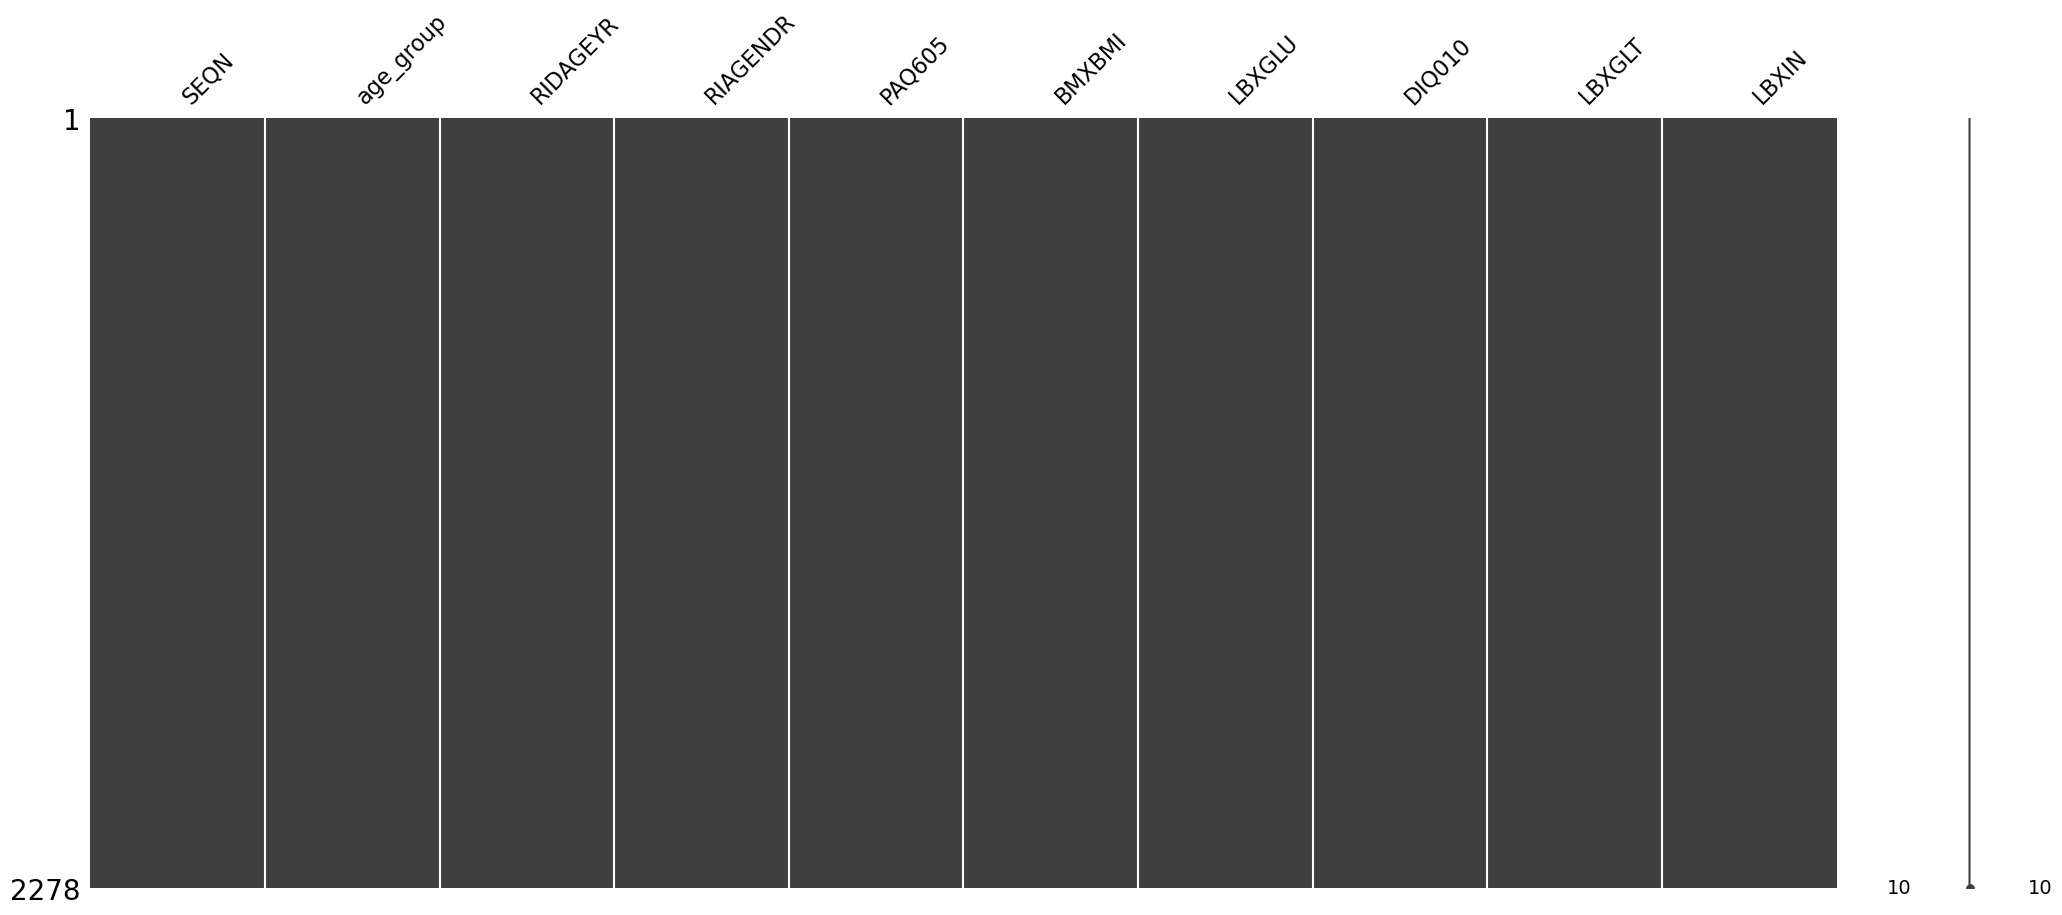

In [15]:
msno.matrix(df)

In [16]:
df_new.shape

(2277, 9)

In [17]:
df_new["age_group"].unique()
df_new["age_group"].value_counts()

age_group
Adult     1913
Senior     364
Name: count, dtype: int64

In [18]:
df_new.columns

Index(['age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU',
       'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

In [19]:
df_new['age_group'].replace('Senior', 0, inplace = True)
df_new['age_group'].replace('Adult', 1, inplace = True)

In [20]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df_new.RIAGENDR= le.fit_transform(df_new.RIAGENDR)
df_new.PAQ605 = le.fit_transform(df_new.PAQ605)
df_new.DIQ010 = le.fit_transform(df_new.DIQ010)

In [21]:
df_new.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1,61.0,1,1,35.7,110.0,1,150.0,14.91
2,1,16.0,0,1,23.2,89.0,1,68.0,6.14
3,1,32.0,0,1,28.9,104.0,1,84.0,16.15
4,1,38.0,1,0,35.9,103.0,1,81.0,10.92
5,1,50.0,0,1,23.6,110.0,1,100.0,6.08


In [22]:
df_new['DIQ010'].unique()

array([1, 0, 2], dtype=int64)

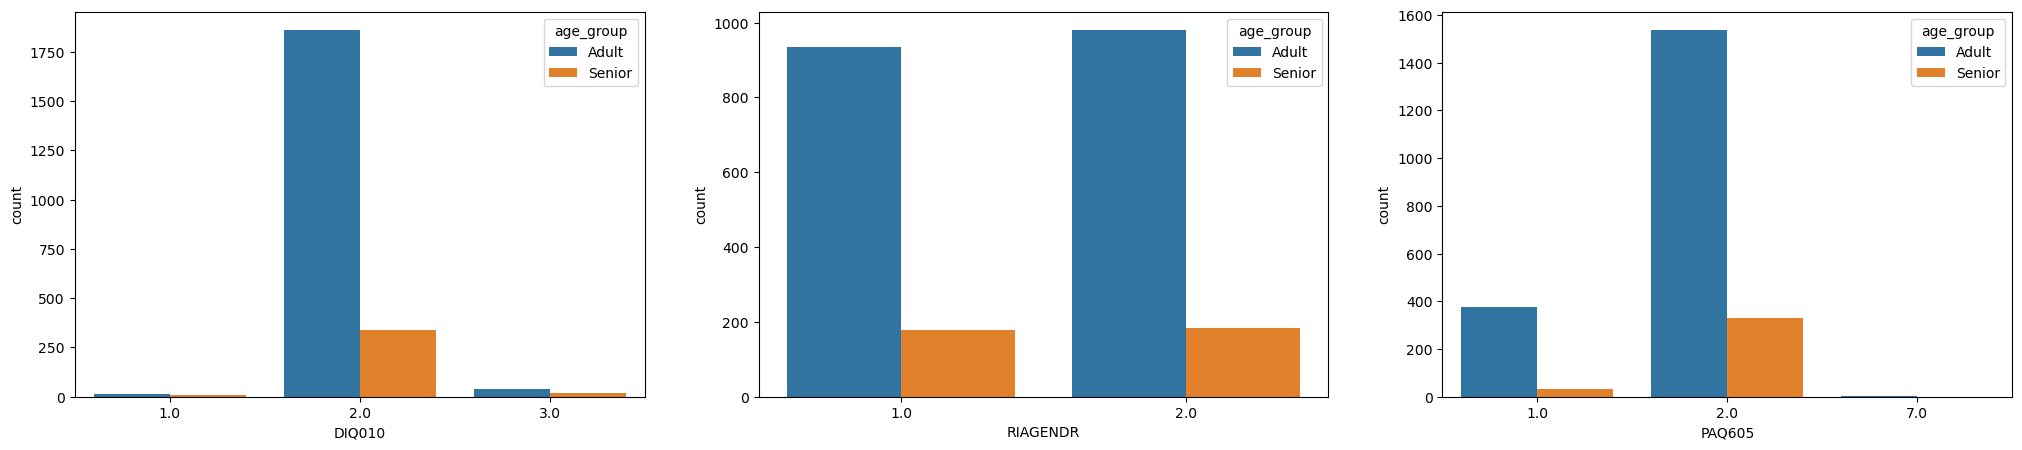

In [23]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
for i, col in enumerate(["DIQ010","RIAGENDR","PAQ605"]):
  sns.countplot(data=df,
                x=col,
                hue='age_group',
                ax=ax[i])

<Axes: xlabel='DIQ010', ylabel='LBXIN'>

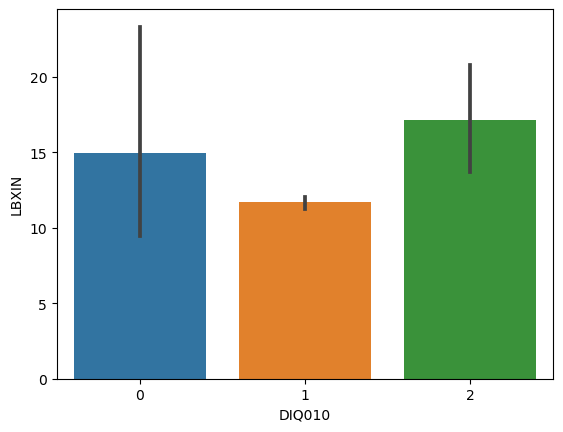

In [44]:
sns.barplot(x='DIQ010', y='LBXIN',data=df_new)

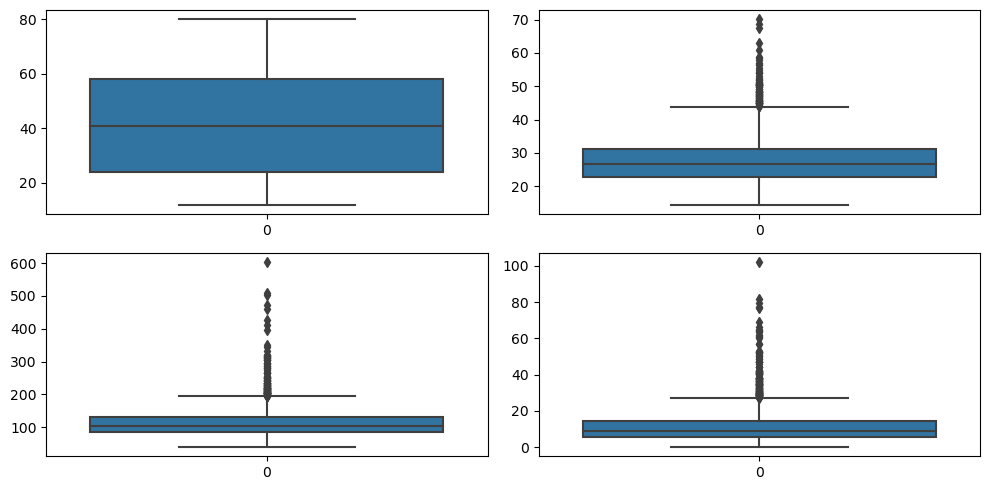

In [90]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['RIDAGEYR'], ax = axs[0,0])
plt2 = sns.boxplot(df['BMXBMI'], ax = axs[0,1])
plt3 = sns.boxplot(df['LBXGLT'], ax = axs[1,0])
plt4 = sns.boxplot(df['LBXIN'], ax = axs[1,1])

plt.tight_layout()

In [26]:
# Capital X because there are more than one feature 
  # y - lower case = because it's only one feature. 
    
X = df_new.drop(columns=["DIQ010"])
y = df_new['DIQ010']

X.shape, y.shape

((2277, 8), (2277,))

In [27]:
class_feature_means = pd.DataFrame(columns=df_new["DIQ010"])
for c, rows in df_new.groupby('DIQ010'):
    class_feature_means[c] = rows.mean()
class_feature_means

DIQ010,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
age_group,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,...,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224
RIDAGEYR,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,...,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511
RIAGENDR,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,...,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284
PAQ605,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,...,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021
BMXBMI,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,...,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803
LBXGLU,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,...,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028
DIQ010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LBXGLT,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,...,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389
LBXIN,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,...,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
easy_lda = lda.fit_transform(X, y)

In [29]:
easy_lda  

array([[ 0.85925811,  0.49250595],
       [-1.19226268, -0.69006504],
       [-0.3725803 ,  0.32600783],
       ...,
       [ 0.00715763,  0.7537236 ],
       [-0.2769358 ,  0.15287498],
       [-0.06666746, -0.96188162]])

In [30]:
lda.explained_variance_ratio_

array([0.93220947, 0.06779053])

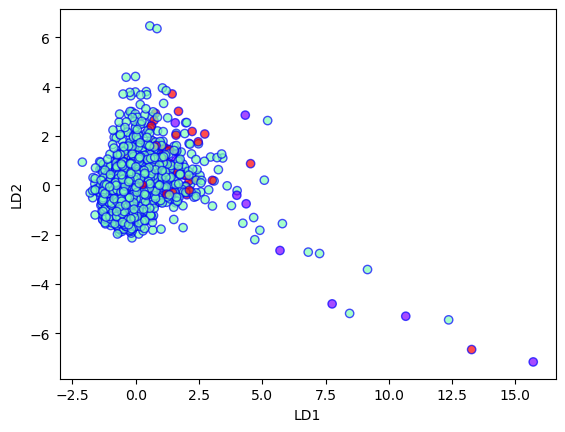

In [31]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    easy_lda[:,0],
    easy_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [33]:
pca.explained_variance_ratio_

array([0.78738857, 0.11729488])

In [34]:
X_pca

array([[ 39.34631469, -13.2462734 ],
       [-51.79551506,  17.70053923],
       [-29.5368704 ,   6.09429238],
       ...,
       [  8.57287538,  10.32311262],
       [ -6.74297253, -20.1399049 ],
       [ -7.26276743,  14.07061861]])

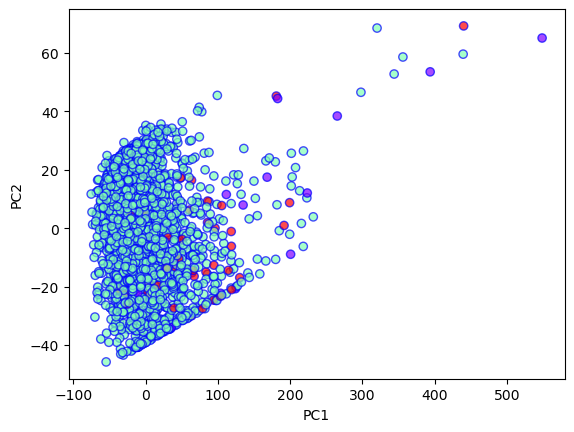

In [35]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [36]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1821, 8), (456, 8), (1821,), (456,))

In [37]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.96


<Axes: >

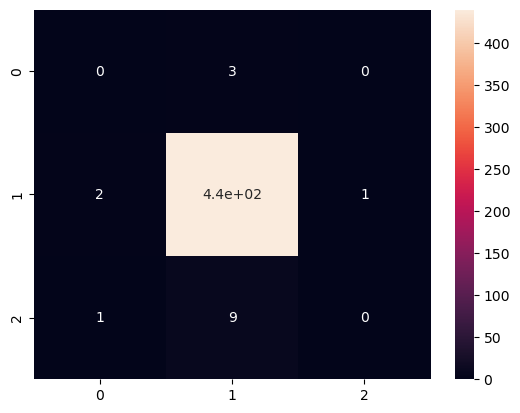

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

In [40]:
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.97      0.99      0.98       443
           2       0.00      0.00      0.00        10

    accuracy                           0.96       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.95      0.96      0.96       456



In [50]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn import tree

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1)

In [59]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.968421052631579
Accuracy: 0.97


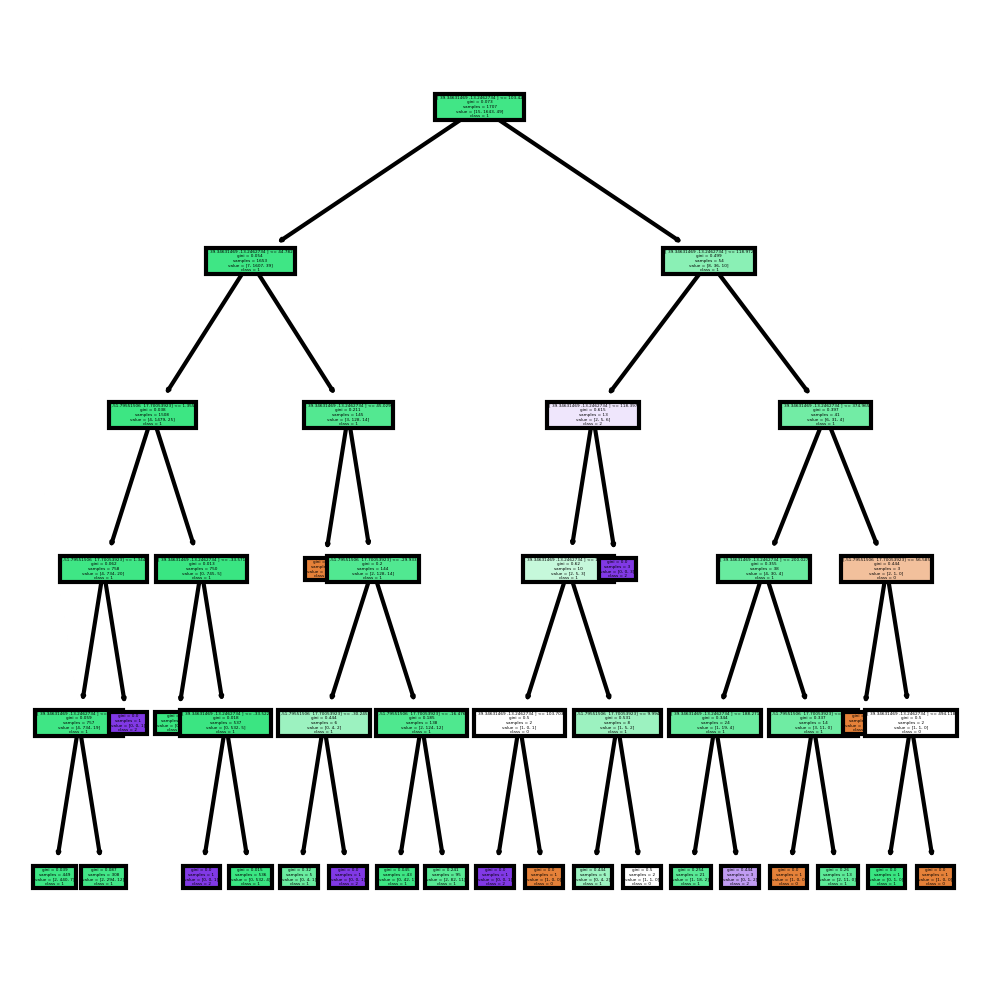

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# column names for dataset
fn=X_pca
# classes of dataset
cn=['0','1', '2']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names = cn,
           filled= True);

In [71]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 30, 5)}

# instantiate the model
rf = DecisionTreeClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 30, 5)}, scoring='accuracy')

In [72]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001279,0.001936,0.000403,0.000807,1,{'max_depth': 1},0.961988,0.961988,0.964809,0.961877,0.961877,0.962508,0.001152,1
1,0.014956,0.006405,0.000801,0.000980,6,{'max_depth': 6},0.950292,0.947368,0.944282,0.938416,0.950147,0.946101,0.004425,2
2,0.018390,0.004893,0.001598,0.001355,11,{'max_depth': 11},0.929825,0.932749,0.944282,0.920821,0.941349,0.933805,0.008393,3
3,0.015789,0.001785,0.003126,0.006251,16,{'max_depth': 16},0.918129,0.932749,0.935484,0.920821,0.938416,0.929120,0.008121,6
4,0.016257,0.006209,0.001024,0.000922,21,{'max_depth': 21},0.915205,0.932749,0.932551,0.929619,0.935484,0.929121,0.007202,5


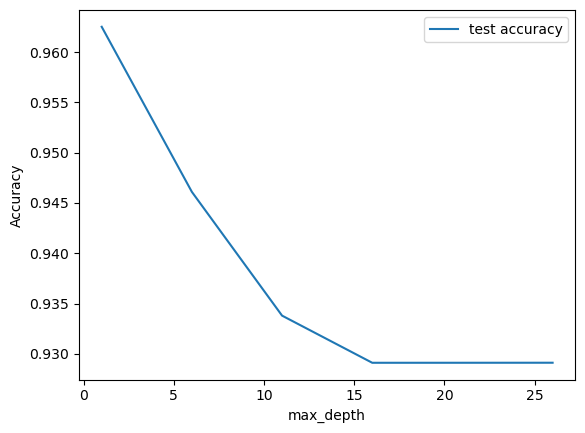

In [73]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [74]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [9,20,40],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
clf = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [77]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={'max_depth': [9]},
             scoring='accuracy')

In [78]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={'max_depth': [9]},
             scoring='accuracy')

In [79]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9384901648059543 using {'max_depth': 9}


In [83]:
# fit
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [85]:
# predict
predictions = clf.predict(X_test)

In [86]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.98      0.97      0.97       555
           2       0.06      0.11      0.08         9

    accuracy                           0.94       570
   macro avg       0.35      0.36      0.35       570
weighted avg       0.95      0.94      0.95       570



In [88]:
print(confusion_matrix(y_test,predictions))

[[  0   5   1]
 [  3 537  15]
 [  0   8   1]]
